In [1]:
#Mounting google and authenticating
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

Mounted at /content/gdrive


In [2]:
%ls /mydrive/music\ project

 chopin_mid/                   default_sound_font.sf2   X_spec_half.pickle
 chopin_segmented_wavs_copy/   direct_float.wav         X_spec.pickle
 chopin_wav/                   guide.gdoc               y_spec_half.pickle
 chpn_p24.wav                 'with*int.wav'            y_spec.pickle
 chp_op.wav                   'writing progress.gdoc'


In [3]:
%cd /mydrive/music\ project

/content/gdrive/My Drive/music project


In [ ]:
#copying and cd into same folder
%cp -av chopin_segmented_wavs/ chopin_segmented_wavs_copy

'chopin_segmented_wavs/' -> 'chopin_segmented_wavs_copy'
'chopin_segmented_wavs/35_chpn-p20.wav' -> 'chopin_segmented_wavs_copy/35_chpn-p20.wav'
'chopin_segmented_wavs/100_chpn_op33_2.wav' -> 'chopin_segmented_wavs_copy/100_chpn_op33_2.wav'
'chopin_segmented_wavs/225_chpn_op35_3.wav' -> 'chopin_segmented_wavs_copy/225_chpn_op35_3.wav'
'chopin_segmented_wavs/405_chpn_op35_3.wav' -> 'chopin_segmented_wavs_copy/405_chpn_op35_3.wav'
'chopin_segmented_wavs/50_chpn-p12.wav' -> 'chopin_segmented_wavs_copy/50_chpn-p12.wav'
'chopin_segmented_wavs/190_chpn_op27_2.wav' -> 'chopin_segmented_wavs_copy/190_chpn_op27_2.wav'
'chopin_segmented_wavs/270_chpn_op35_3.wav' -> 'chopin_segmented_wavs_copy/270_chpn_op35_3.wav'
'chopin_segmented_wavs/15_chpn-p1.wav' -> 'chopin_segmented_wavs_copy/15_chpn-p1.wav'
'chopin_segmented_wavs/40_chpn-p21.wav' -> 'chopin_segmented_wavs_copy/40_chpn-p21.wav'
'chopin_segmented_wavs/345_chp_op31.wav' -> 'chopin_segmented_wavs_copy/345_chp_op31.wav'
'chopin_segmented_wavs/

In [4]:
import librosa

In [ ]:
!cp /mydrive/music\ project/chopin_segmented_wavs_copy/0_chp_op31.wav ./

In [15]:
%cd ..
#/content/gdrive/MyDrive/music project
#/content/gdrive/MyDrive/music project/chopin_segmented_wavs_copy/0_chp_op18.wav

/content


In [13]:
!pwd

/content/gdrive/My Drive


(128, 646) File Testing


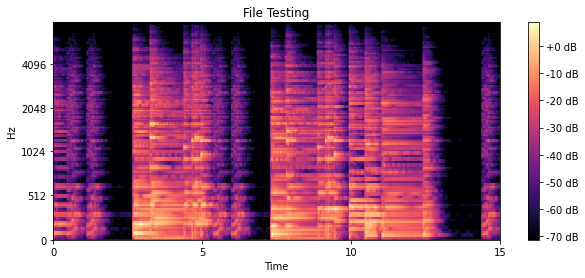

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

y, sr = librosa.load('/content/gdrive/MyDrive/music project/chopin_segmented_wavs_copy/0_chp_op18.wav')
import numpy as np
spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
spect = librosa.power_to_db(spect, ref=1.0)

genre_name = 'File Testing'
print(spect.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

(128, 646) File Testing


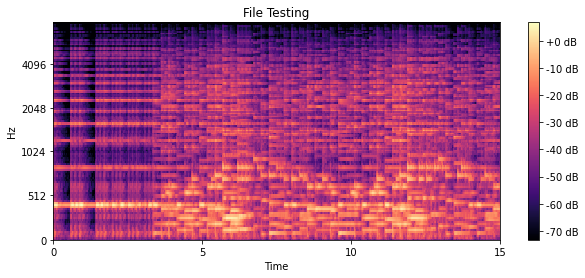

In [6]:
import matplotlib.pyplot as plt
import librosa.display

y, sr = librosa.load('/content/gdrive/MyDrive/music project/chopin_segmented_wavs_copy/0_chp_op18.wav')
import numpy as np
spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
spect = librosa.power_to_db(spect, ref=1.0)

genre_name = 'File Testing'
print(spect.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

In [16]:
!cp /mydrive/music\ project/chopin_segmented_wavs_copy/*.wav ./train/

In [21]:
#to numpy
import os
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
X_spect = np.empty((0, 300, 128))
y_spect = np.empty((0, 300, 128))

data_path='/content/train/'
categories=os.listdir(data_path)

for sample in categories:
  m_wav = os.path.join(data_path, sample) 
  y, sr = librosa.load(m_wav)
  spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
  spect = librosa.power_to_db(spect, ref=1.0)
  spect_x = spect.T[:300,:]
  X_spect = np.append(X_spect, [spect_x], axis=0)
  spect_y = spect.T[300:600,:]
  y_spect = np.append(y_spect, [spect_y], axis=0)

In [18]:
#Getting min duration of songs
import os
import numpy as np

data_path='/content/train/'
categories=os.listdir(data_path)
new_data=[]

for sample in categories:
  m_file = os.path.join(data_path, sample)
  #duration.append(librosa.get_duration(filename=m_file))
  time = librosa.get_duration(filename=m_file)
  if time == 15.0:
    new_data.append(m_file)
  else:
    continue
 
len(new_data)

1431

In [ ]:
#to numpy
import os
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
X_spect = np.empty((0, 300, 128))
y_spect = np.empty((0, 300, 128))

data_path='/content/train/'
categories=os.listdir(data_path)

for sample in new_data: 
  y, sr = librosa.load(sample)
  spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
  spect = librosa.power_to_db(spect, ref=1.0)
  spect_x = spect.T[:300,:]
  X_spect = np.append(X_spect, [spect_x], axis=0)
  spect_y = spect.T[300:600,:]
  y_spect = np.append(y_spect, [spect_y], axis=0)

In [20]:
import numpy as np

new_data_array = np.array(new_data) 

